In [1]:
#importing depencies
#install quandl module by pip install quandl
import quandl
import datetime
import csv
import pandas as pd
import time
import numpy as np
from sklearn import preprocessing,cross_validation, svm
from sklearn.linear_model import LinearRegression

quandl.ApiConfig.api_key = 'ZWxJg8mpT4sgAwGk-4dr'

def quandl_stocks(symbol, start_date=(2010, 1, 1), end_date=(2018,3,26)):
    query_list = ['WIKI' + '/' + symbol + '.' + str(k) for k in range(1, 13)]
    start_date = datetime.date(*start_date)
    if end_date:
        end_date = datetime.date(*end_date)
    else:
        end_date = datetime.date.today()

    return quandl.get(query_list,
            returns='pandas',
            start_date=start_date,
            end_date=end_date,
            collapse='daily',
            order='asc'
            )
#code to extract dataset from quandl
#found at quandl website

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
google_data = quandl_stocks('GOOGL')

In [3]:
d = pd.DataFrame(google_data) #create a dataframe

In [4]:
d #dataframe

,WIKI/GOOGL - Open,WIKI/GOOGL - High,WIKI/GOOGL - Low,WIKI/GOOGL - Close,WIKI/GOOGL - Volume,WIKI/GOOGL - Ex-Dividend,WIKI/GOOGL - Split Ratio,WIKI/GOOGL - Adj. Open,WIKI/GOOGL - Adj. High,WIKI/GOOGL - Adj. Low,WIKI/GOOGL - Adj. Close,WIKI/GOOGL - Adj. Volume
Date,,,,,,,,,,,,
2010-01-04,626.9500,629.5100,624.2400,626.750,3908400.0,0.0,1.0,314.445664,315.729627,313.086468,314.345354,3908400.0
2010-01-05,627.1800,627.8400,621.5400,623.990,6003300.0,0.0,1.0,314.561020,314.892042,311.732288,312.961081,6003300.0
2010-01-06,625.8600,625.8600,606.3600,608.260,7949400.0,0.0,1.0,313.898976,313.898976,304.118786,305.071727,7949400.0
2010-01-07,609.4000,610.0000,592.6500,594.100,12815700.0,0.0,1.0,305.643492,305.944421,297.242559,297.969804,12815700.0
2010-01-08,592.0000,603.2500,589.1100,602.020,9439100.0,0.0,1.0,296.916553,302.558971,295.467079,301.942066,9439100.0
2010-01-11,604.4600,604.4600,594.0400,601.110,14411300.0,0.0,1.0,303.165844,303.165844,297.939711,301.485657,14411300.0
2010-01-12,598.0800,598.1600,588.0000,590.480,9696800.0,0.0,1.0,299.965966,300.006090,294.910360,296.154200,9696800.0
2010-01-13,576.4900,588.3800,573.9000,587.090,12980200.0,0.0,1.0,289.137540,295.100948,287.838530,294.453951,12980200.0
2010-01-14,583.9000,594.2000,582.8100,589.850,8471700.0,0.0,1.0,292.854012,298.019959,292.307325,295.838224,8471700.0


In [5]:
d.columns = d.columns.str.replace('WIKI/GOOGL - ','') #namning the columns properly

In [6]:
data = d.iloc[:, 0:5] #choosing first 5 columns and storing into data

In [7]:
data #dataframe

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,626.9500,629.5100,624.2400,626.750,3908400.0
2010-01-05,627.1800,627.8400,621.5400,623.990,6003300.0
2010-01-06,625.8600,625.8600,606.3600,608.260,7949400.0
2010-01-07,609.4000,610.0000,592.6500,594.100,12815700.0
2010-01-08,592.0000,603.2500,589.1100,602.020,9439100.0
2010-01-11,604.4600,604.4600,594.0400,601.110,14411300.0
2010-01-12,598.0800,598.1600,588.0000,590.480,9696800.0
2010-01-13,576.4900,588.3800,573.9000,587.090,12980200.0
2010-01-14,583.9000,594.2000,582.8100,589.850,8471700.0


In [8]:
data['Date']= data.index #creatimg a new column for date

In [9]:
data

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2010-01-04,626.9500,629.5100,624.2400,626.750,3908400.0,2010-01-04
2010-01-05,627.1800,627.8400,621.5400,623.990,6003300.0,2010-01-05
2010-01-06,625.8600,625.8600,606.3600,608.260,7949400.0,2010-01-06
2010-01-07,609.4000,610.0000,592.6500,594.100,12815700.0,2010-01-07
2010-01-08,592.0000,603.2500,589.1100,602.020,9439100.0,2010-01-08
2010-01-11,604.4600,604.4600,594.0400,601.110,14411300.0,2010-01-11
2010-01-12,598.0800,598.1600,588.0000,590.480,9696800.0,2010-01-12
2010-01-13,576.4900,588.3800,573.9000,587.090,12980200.0,2010-01-13
2010-01-14,583.9000,594.2000,582.8100,589.850,8471700.0,2010-01-14


In [10]:
dates=[]
dates = data['Date']
dates #transferring Date column to a list

Date
2010-01-04   2010-01-04
2010-01-05   2010-01-05
2010-01-06   2010-01-06
2010-01-07   2010-01-07
2010-01-08   2010-01-08
2010-01-11   2010-01-11
2010-01-12   2010-01-12
2010-01-13   2010-01-13
2010-01-14   2010-01-14
2010-01-15   2010-01-15
2010-01-19   2010-01-19
2010-01-20   2010-01-20
2010-01-21   2010-01-21
2010-01-22   2010-01-22
2010-01-25   2010-01-25
2010-01-26   2010-01-26
2010-01-27   2010-01-27
2010-01-28   2010-01-28
2010-01-29   2010-01-29
2010-02-01   2010-02-01
2010-02-02   2010-02-02
2010-02-03   2010-02-03
2010-02-04   2010-02-04
2010-02-05   2010-02-05
2010-02-08   2010-02-08
2010-02-09   2010-02-09
2010-02-10   2010-02-10
2010-02-11   2010-02-11
2010-02-12   2010-02-12
2010-02-16   2010-02-16
                ...    
2018-02-12   2018-02-12
2018-02-13   2018-02-13
2018-02-14   2018-02-14
2018-02-15   2018-02-15
2018-02-16   2018-02-16
2018-02-20   2018-02-20
2018-02-21   2018-02-21
2018-02-22   2018-02-22
2018-02-23   2018-02-23
2018-02-26   2018-02-26
2018-02-27 

In [11]:
dates = [int(x.strftime(format='%Y%m%d')) for x in dates] #convertinh timestamps to integers

In [12]:
dates

[20100104,
 20100105,
 20100106,
 20100107,
 20100108,
 20100111,
 20100112,
 20100113,
 20100114,
 20100115,
 20100119,
 20100120,
 20100121,
 20100122,
 20100125,
 20100126,
 20100127,
 20100128,
 20100129,
 20100201,
 20100202,
 20100203,
 20100204,
 20100205,
 20100208,
 20100209,
 20100210,
 20100211,
 20100212,
 20100216,
 20100217,
 20100218,
 20100219,
 20100222,
 20100223,
 20100224,
 20100225,
 20100226,
 20100301,
 20100302,
 20100303,
 20100304,
 20100305,
 20100308,
 20100309,
 20100310,
 20100311,
 20100312,
 20100315,
 20100316,
 20100317,
 20100318,
 20100319,
 20100322,
 20100323,
 20100324,
 20100325,
 20100326,
 20100329,
 20100330,
 20100331,
 20100401,
 20100405,
 20100406,
 20100407,
 20100408,
 20100409,
 20100412,
 20100413,
 20100414,
 20100415,
 20100416,
 20100419,
 20100420,
 20100421,
 20100422,
 20100423,
 20100426,
 20100427,
 20100428,
 20100429,
 20100430,
 20100503,
 20100504,
 20100505,
 20100506,
 20100507,
 20100510,
 20100511,
 20100512,
 20100513,

In [13]:
dates = np.array(dates)
dates #converting into np array

array([20100104, 20100105, 20100106, ..., 20180322, 20180323, 20180326])

In [14]:
d = np.reshape(dates, (-1,1))
d #reshaping into a 2D array

array([[20100104],
       [20100105],
       [20100106],
       ...,
       [20180322],
       [20180323],
       [20180326]])

In [15]:
prices = []
prices = data['Open'].values #detting prices column into a list

In [16]:
prices

array([ 626.95,  627.18,  625.86, ..., 1080.01, 1051.37, 1050.6 ])

In [17]:
prices = np.array(prices) #changinf into np array

In [18]:
p = np.reshape(prices, (-1,1)) #reshaping i to a 2D array

In [19]:
p

array([[ 626.95],
       [ 627.18],
       [ 625.86],
       ...,
       [1080.01],
       [1051.37],
       [1050.6 ]])

In [20]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR 

In [21]:
svrrbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1) #the rbf SVR fits best to plot dates vs prices
svrrbf.fit(d,p)
#linear aand multilinear models did not fit the points neatly and rbf is far better.

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

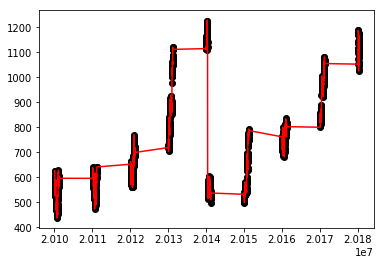

In [22]:
plt.scatter(d, p,color= 'black', label = 'Data')
plt.plot(d, svrrbf.predict(d), color = 'red',label = 'RBF Model') #plot
# for a clear graaph, take less data points. take start date = 2018-01-01. but this would result in less accuracy.

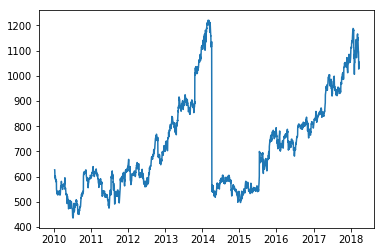

In [23]:
plt.plot(data['Close'])

In [24]:
data.head() #top 5 elements of the datset

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2010-01-04,626.95,629.51,624.24,626.75,3908400.0,2010-01-04
2010-01-05,627.18,627.84,621.54,623.99,6003300.0,2010-01-05
2010-01-06,625.86,625.86,606.36,608.26,7949400.0,2010-01-06
2010-01-07,609.40,610.00,592.65,594.10,12815700.0,2010-01-07
2010-01-08,592.00,603.25,589.11,602.02,9439100.0,2010-01-08


In [25]:
data

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2010-01-04,626.9500,629.5100,624.2400,626.750,3908400.0,2010-01-04
2010-01-05,627.1800,627.8400,621.5400,623.990,6003300.0,2010-01-05
2010-01-06,625.8600,625.8600,606.3600,608.260,7949400.0,2010-01-06
2010-01-07,609.4000,610.0000,592.6500,594.100,12815700.0,2010-01-07
2010-01-08,592.0000,603.2500,589.1100,602.020,9439100.0,2010-01-08
2010-01-11,604.4600,604.4600,594.0400,601.110,14411300.0,2010-01-11
2010-01-12,598.0800,598.1600,588.0000,590.480,9696800.0,2010-01-12
2010-01-13,576.4900,588.3800,573.9000,587.090,12980200.0,2010-01-13
2010-01-14,583.9000,594.2000,582.8100,589.850,8471700.0,2010-01-14


In [26]:
data['HL_PCT'] = (data['High'] - data['Close'])/data['Close'] * 100
data['PCT_CHANGE'] = (data['Close'] - data['Open'])/data['Open'] * 100

final_data = data[['Close','HL_PCT','PCT_CHANGE','Open']]
data

,Open,High,Low,Close,Volume,Date,HL_PCT,PCT_CHANGE
Date,,,,,,,,
2010-01-04,626.9500,629.5100,624.2400,626.750,3908400.0,2010-01-04,0.440367,-0.031900
2010-01-05,627.1800,627.8400,621.5400,623.990,6003300.0,2010-01-05,0.616997,-0.508626
2010-01-06,625.8600,625.8600,606.3600,608.260,7949400.0,2010-01-06,2.893499,-2.812131
2010-01-07,609.4000,610.0000,592.6500,594.100,12815700.0,2010-01-07,2.676317,-2.510666
2010-01-08,592.0000,603.2500,589.1100,602.020,9439100.0,2010-01-08,0.204312,1.692568
2010-01-11,604.4600,604.4600,594.0400,601.110,14411300.0,2010-01-11,0.557302,-0.554214
2010-01-12,598.0800,598.1600,588.0000,590.480,9696800.0,2010-01-12,1.300637,-1.270733
2010-01-13,576.4900,588.3800,573.9000,587.090,12980200.0,2010-01-13,0.219728,1.838714
2010-01-14,583.9000,594.2000,582.8100,589.850,8471700.0,2010-01-14,0.737476,1.019010


In [27]:
final_data

,Close,HL_PCT,PCT_CHANGE,Open
Date,,,,
2010-01-04,626.750,0.440367,-0.031900,626.9500
2010-01-05,623.990,0.616997,-0.508626,627.1800
2010-01-06,608.260,2.893499,-2.812131,625.8600
2010-01-07,594.100,2.676317,-2.510666,609.4000
2010-01-08,602.020,0.204312,1.692568,592.0000
2010-01-11,601.110,0.557302,-0.554214,604.4600
2010-01-12,590.480,1.300637,-1.270733,598.0800
2010-01-13,587.090,0.219728,1.838714,576.4900
2010-01-14,589.850,0.737476,1.019010,583.9000


In [28]:
import math
forecast_out = 2
final_data['label']= final_data['Close'].shift(-forecast_out) #shiftig the column upwards by 2 indexes
#we do this to each value of close for a day will map to value of close after two days
final_data.dropna(inplace=True) #dropping all the na values
final_data
#the column is named lael because it the column we have to predict on.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Close,HL_PCT,PCT_CHANGE,Open,label
Date,,,,,
2010-01-04,626.750,0.440367,-0.031900,626.9500,608.260
2010-01-05,623.990,0.616997,-0.508626,627.1800,594.100
2010-01-06,608.260,2.893499,-2.812131,625.8600,602.020
2010-01-07,594.100,2.676317,-2.510666,609.4000,601.110
2010-01-08,602.020,0.204312,1.692568,592.0000,590.480
2010-01-11,601.110,0.557302,-0.554214,604.4600,587.090
2010-01-12,590.480,1.300637,-1.270733,598.0800,589.850
2010-01-13,587.090,0.219728,1.838714,576.4900,580.000
2010-01-14,589.850,0.737476,1.019010,583.9000,587.620


In [29]:
final_data

,Close,HL_PCT,PCT_CHANGE,Open,label
Date,,,,,
2010-01-04,626.750,0.440367,-0.031900,626.9500,608.260
2010-01-05,623.990,0.616997,-0.508626,627.1800,594.100
2010-01-06,608.260,2.893499,-2.812131,625.8600,602.020
2010-01-07,594.100,2.676317,-2.510666,609.4000,601.110
2010-01-08,602.020,0.204312,1.692568,592.0000,590.480
2010-01-11,601.110,0.557302,-0.554214,604.4600,587.090
2010-01-12,590.480,1.300637,-1.270733,598.0800,589.850
2010-01-13,587.090,0.219728,1.838714,576.4900,580.000
2010-01-14,589.850,0.737476,1.019010,583.9000,587.620


In [30]:
X = final_data.iloc[:,0:4] #slecting first 4 columns - features we use
X = np.array(X) #converting them into an np array
X = X[:-forecast_out] #shifting two rows upwards
X_lately = X[-forecast_out:] #the last 2 elemnts of x
final_data.dropna(inplace=True) #dropping na values
y= np.array(final_data['label']) #the label column y
y= y[forecast_out:] #leaving the first two elements
print(len(X),len(y))

2066 2066


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [31]:
X

array([[ 6.26750000e+02,  4.40366972e-01, -3.19004705e-02,
         6.26950000e+02],
       [ 6.23990000e+02,  6.16997067e-01, -5.08625913e-01,
         6.27180000e+02],
       [ 6.08260000e+02,  2.89349949e+00, -2.81213051e+00,
         6.25860000e+02],
       ...,
       [ 1.13442000e+03,  1.97369581e+00, -1.81157225e+00,
         1.15535000e+03],
       [ 1.10007000e+03,  1.75443381e+00, -1.58262954e+00,
         1.11776000e+03],
       [ 1.09580000e+03,  8.89760905e-01, -2.36707939e-01,
         1.09840000e+03]])

In [32]:
y

array([ 602.02,  601.11,  590.48, ..., 1053.15, 1026.55, 1054.09])

In [33]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2) #splitting the data

In [34]:
regr = LinearRegression(n_jobs=-1) #loading the model
regr.fit(X_train,y_train) #fitting 
accuracy=regr.score(X_test,y_test) #accuarcy of prediction
print (accuracy)


0.9594309064084858


In [35]:
forecast_set= regr.predict(X_lately)
print (forecast_set)

[1097.95796968 1092.42064474]
